# Time Series Exercise

#### TLDR/Spoiler Alert: I failed to achieve the prediction objective.  Everything went well until the tests for normality.  No matter how I downsampled data and/or doing diff's, sqrt, log, the data just isn't normal and I failed to transform it into a normal distribution.  As a result, I spent quite a long time chasing various configurations and models with no impact.  

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_rows', 50000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

In [2]:
df = pd.read_csv('sample_data.csv')

## Objective = Predict When Max Pressure Will Reach 50 mbar

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         9919 non-null   int64  
 1   min pressure      9919 non-null   float64
 2   average pressure  9919 non-null   float64
 3   max pressure      9919 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 310.1 KB


In [4]:
df.columns = ['timestamp', 'min_pressure', 'avg_pressure', 'max_pressure']

In [5]:
df.head()

,timestamp,min_pressure,avg_pressure,max_pressure
0,1506198101,0.00,0.20,0.30
1,1506198342,0.00,0.00,0.60
2,1506204979,0.00,0.00,0.00
3,1506204998,0.00,0.40,0.90
4,1506205008,0.00,0.00,0.00


In [7]:
df['timestamp']= pd.to_datetime(df['timestamp'], unit='s')

In [8]:
df.head()

,timestamp,min_pressure,avg_pressure,max_pressure
0,2017-09-23 20:21:41,0.00,0.20,0.30
1,2017-09-23 20:25:42,0.00,0.00,0.60
2,2017-09-23 22:16:19,0.00,0.00,0.00
3,2017-09-23 22:16:38,0.00,0.40,0.90
4,2017-09-23 22:16:48,0.00,0.00,0.00


In [9]:
df.set_index('timestamp', inplace=True)

In [10]:
df.head(25)

,min_pressure,avg_pressure,max_pressure
timestamp,,,
2017-09-23 20:21:41,0.00,0.20,0.30
2017-09-23 20:25:42,0.00,0.00,0.60
2017-09-23 22:16:19,0.00,0.00,0.00
2017-09-23 22:16:38,0.00,0.40,0.90
2017-09-23 22:16:48,0.00,0.00,0.00
2017-09-23 22:16:57,0.00,0.00,0.00
2017-09-23 22:16:58,0.00,0.00,0.00
2017-09-23 22:22:01,0.00,1.50,7.50
2017-09-23 22:26:55,0.00,0.90,5.90


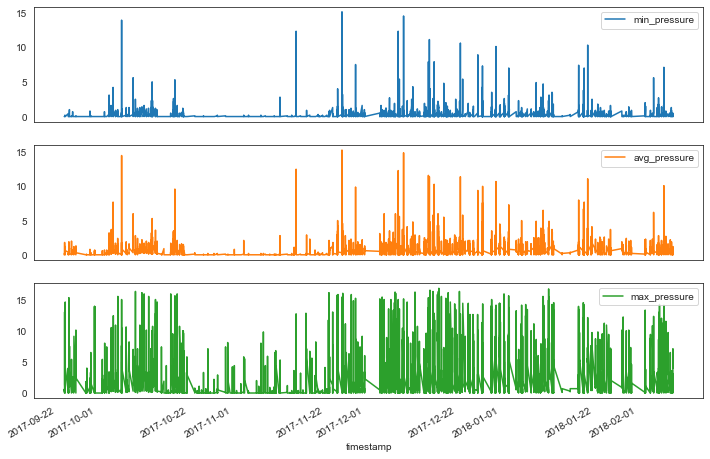

In [12]:
df.plot(subplots=True, figsize=(12,8))
plt.show()

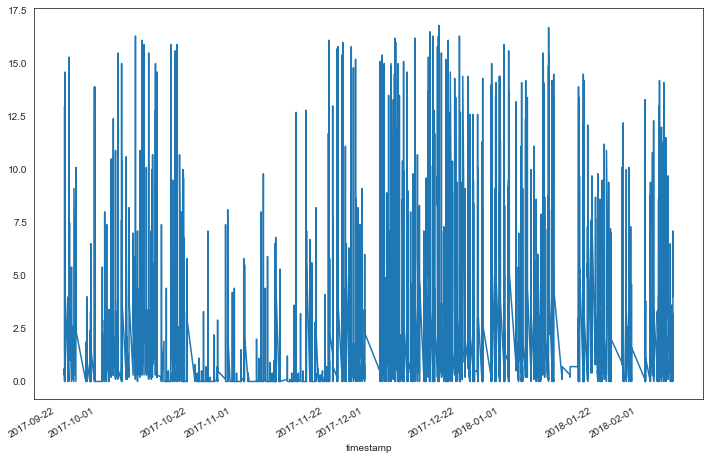

In [15]:
df['max_pressure'].plot(figsize=(12,8))
plt.show()

In [16]:
df.describe()

,min_pressure,avg_pressure,max_pressure
count,9919.00,9919.00,9919.00
mean,0.19,0.49,1.52
std,0.65,0.96,2.81
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.10,0.30
75%,0.20,0.60,1.40
max,15.10,15.30,16.80


### IQR is quite low for max pressure.  If max in this sample is 16.8, is 50 a realistic or commonly occurring level?

In [17]:
# Create Subset That Only Contains the max_pressure variable
df2 = df.copy()
df2 = df2[['max_pressure']]

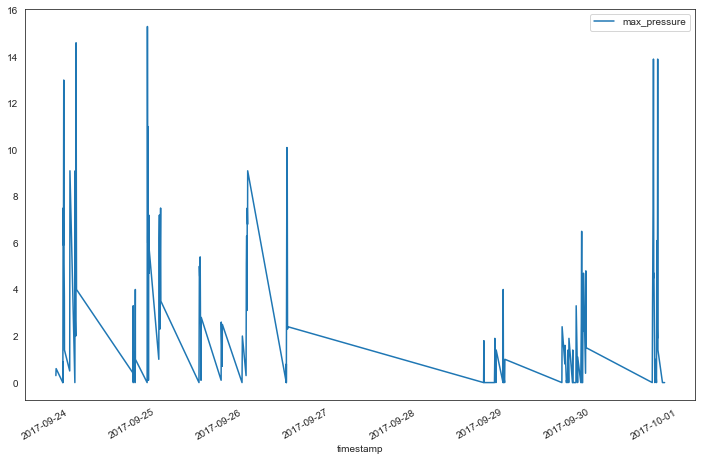

In [18]:
df2['2017-09'].plot(figsize=(12,8))
plt.show()

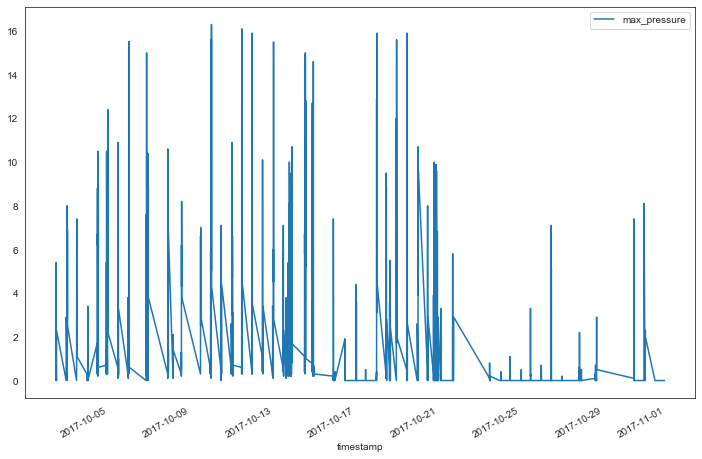

In [19]:
df2['2017-10'].plot(figsize=(12,8))
plt.show()

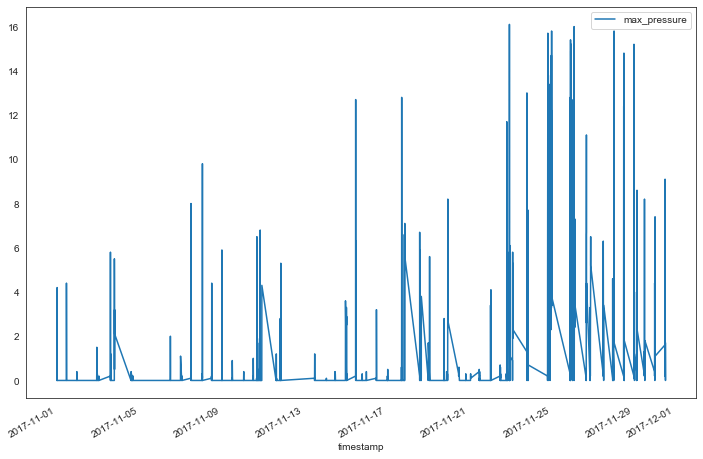

In [20]:
df2['2017-11'].plot(figsize=(12,8))
plt.show()

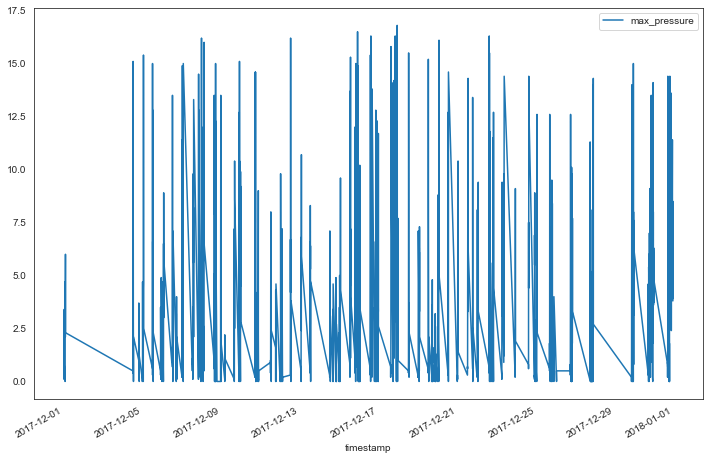

In [21]:
df2['2017-12'].plot(figsize=(12,8))
plt.show()

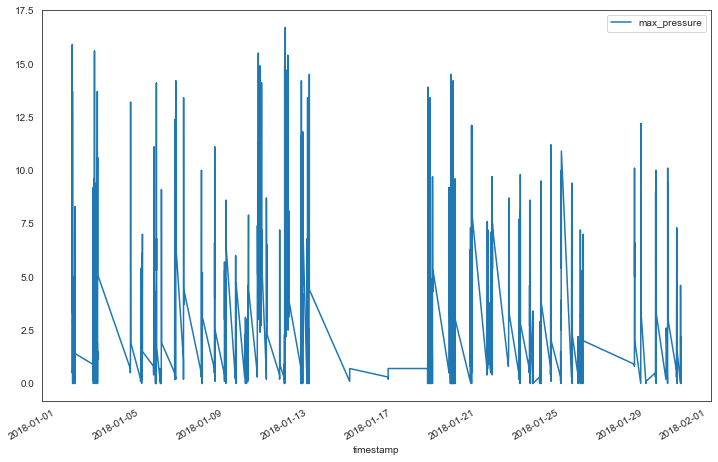

In [22]:
df2['2018-01'].plot(figsize=(12,8))
plt.show()

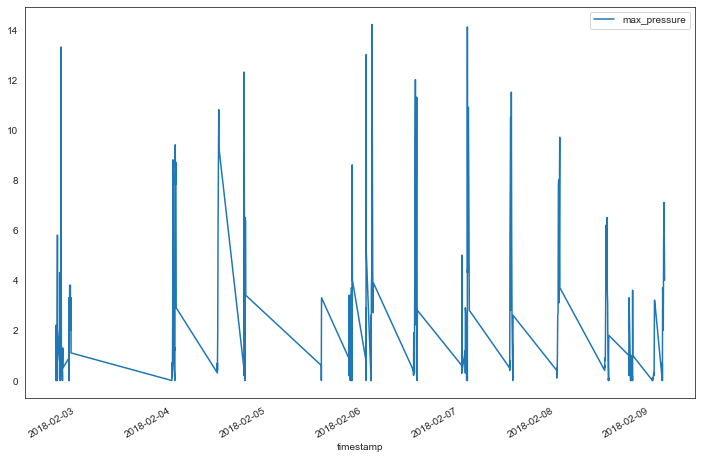

In [23]:
df2['2018-02'].plot(figsize=(12,8))
plt.show()

### What was going on that made September and February so sparse?

In [38]:
df_min = df2.resample('1T').bfill()

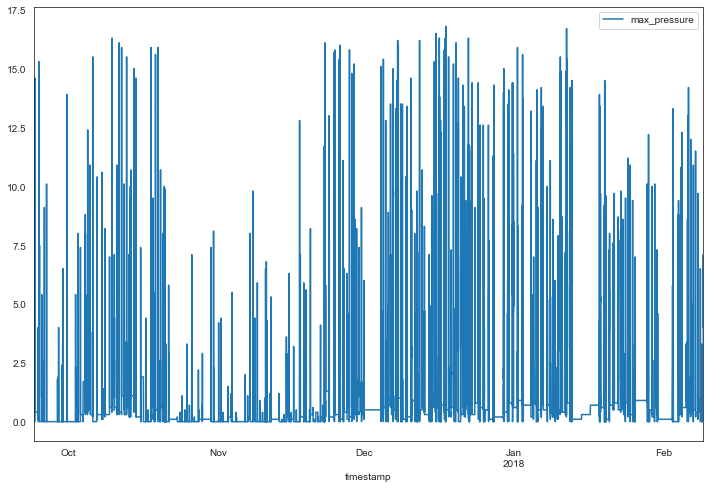

In [39]:
df_min.plot(figsize=(12,8))
plt.show()

In [40]:
df_min.describe()

,max_pressure
count,199152.00
mean,0.58
std,1.43
min,0.00
25%,0.00
50%,0.30
75%,0.60
max,16.80


In [41]:
df_min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199152 entries, 2017-09-23 20:21:00 to 2018-02-09 03:32:00
Freq: T
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   max_pressure  199152 non-null  float64
dtypes: float64(1)
memory usage: 3.0 MB


In [42]:
df_30min = df2.resample('30T').bfill()

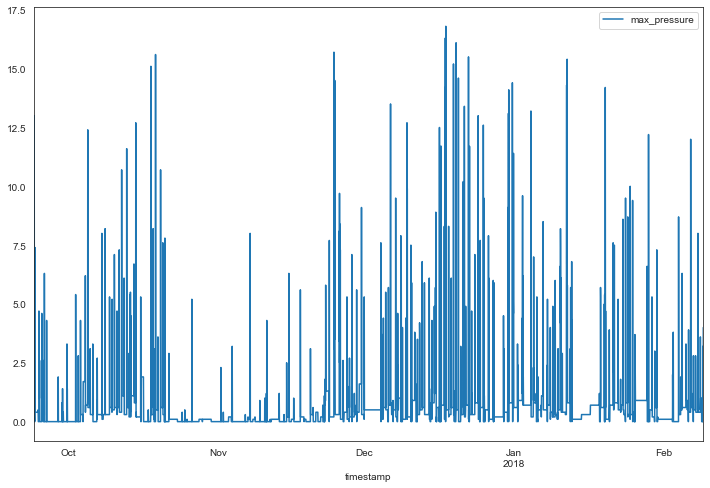

In [43]:
df_30min.plot(figsize=(12,8))
plt.show()

In [44]:
df_30min.describe()

,max_pressure
count,6640.00
mean,0.59
std,1.47
min,0.00
25%,0.00
50%,0.30
75%,0.60
max,16.80


In [45]:
df_30min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6640 entries, 2017-09-23 20:00:00 to 2018-02-09 03:30:00
Freq: 30T
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   max_pressure  6640 non-null   float64
dtypes: float64(1)
memory usage: 103.8 KB


In [46]:
df_hr = df2.resample('1H').bfill()

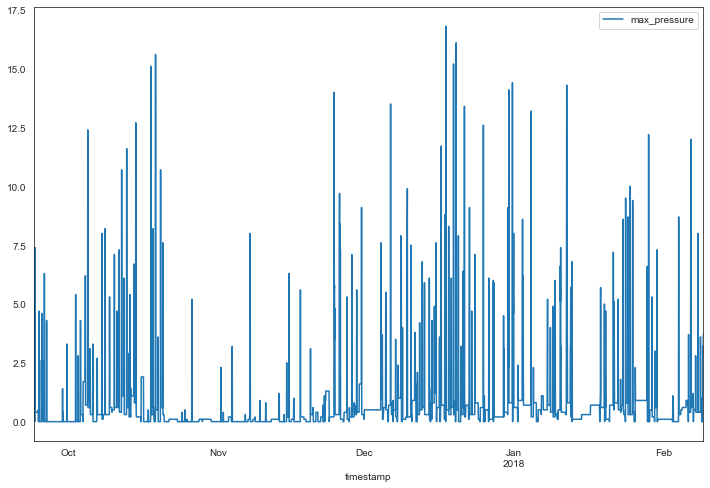

In [47]:
df_hr.plot(figsize=(12,8))
plt.show()

In [48]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3320 entries, 2017-09-23 20:00:00 to 2018-02-09 03:00:00
Freq: H
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   max_pressure  3320 non-null   float64
dtypes: float64(1)
memory usage: 51.9 KB


In [49]:
df_4hr = df2.resample('4H').bfill()

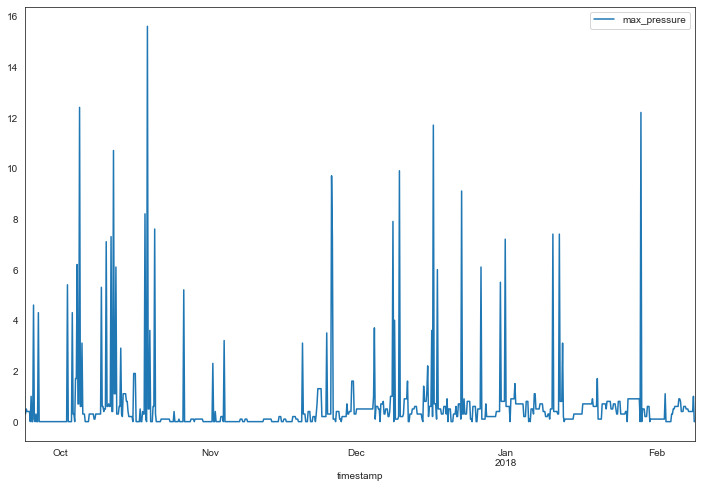

In [51]:
df_4hr.plot(figsize=(12,8))
plt.show()

In [52]:
df_4hr.describe()

,max_pressure
count,830.00
mean,0.62
std,1.51
min,0.00
25%,0.00
50%,0.30
75%,0.60
max,15.60


In [53]:
df_8hr = df2.resample('8H').bfill()

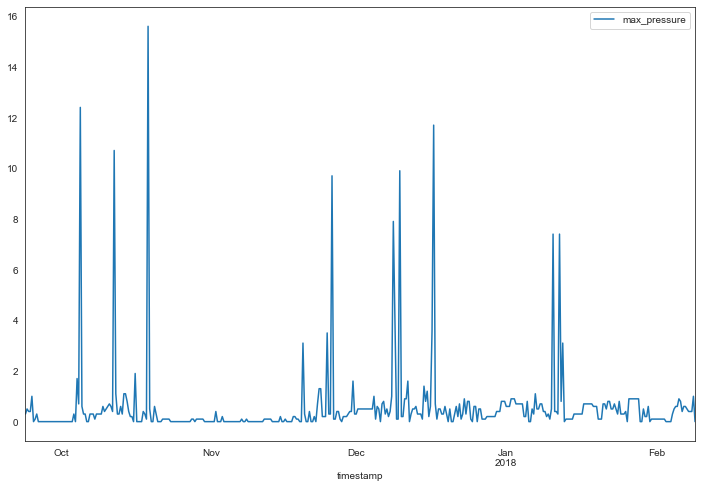

In [54]:
df_8hr.plot(figsize=(12,8))
plt.show()

In [55]:
df_8hr.describe()

,max_pressure
count,416.00
mean,0.57
std,1.57
min,0.00
25%,0.00
50%,0.30
75%,0.53
max,15.60


In [56]:
df_12hr = df2.resample('12H').bfill()

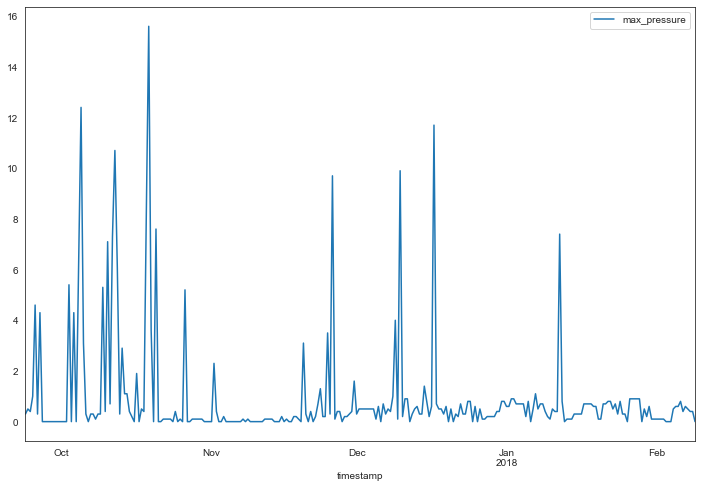

In [57]:
df_12hr.plot(figsize=(12,8))
plt.show()

In [58]:
df_12hr.describe()

,max_pressure
count,278.00
mean,0.92
std,2.11
min,0.00
25%,0.10
50%,0.30
75%,0.70
max,15.60


In [59]:
df_daily = df2.resample('1D').bfill()

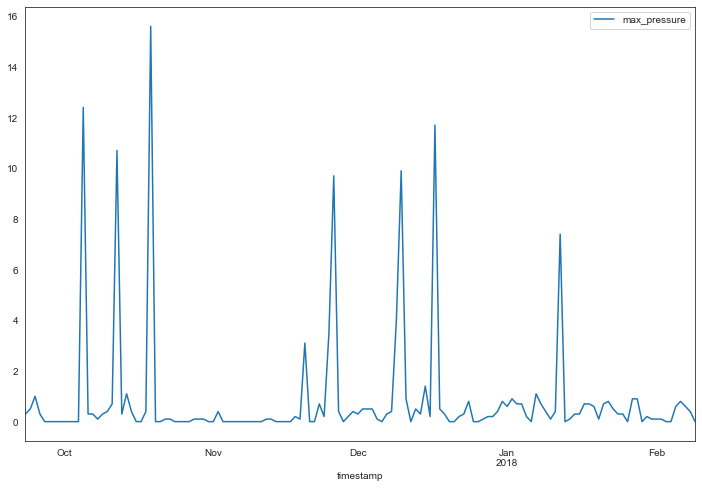

In [60]:
df_daily.plot(figsize=(12,8))
plt.show()

## With the irregularity of the original timesample, I'm not sure which downsample is best.  Will alternate from the extremes and iterate until the best sample/fit has been identified

### Use Augmented Dickey-Fuller Test To Check For Stationary Timeseries.  Null Hypothesis = data is non-stationary

In [61]:
from statsmodels.tsa.stattools import adfuller

In [62]:
adf_daily = adfuller(df_daily['max_pressure'])

In [63]:
print('The Daily ADF Test Stat is : ', adf_daily[0])
print('The Daily ADF p-value is : ', adf_daily[1])

The Daily ADF Test Stat is :  -3.1090935782288636
The Daily ADF p-value is :  0.025887501367426558


### Daily timeseries is statistically significant (< 0.05 p value) and can reject the null hypothesis.  Alternate hypothesis = data is stationary.

In [65]:
adf_min = adfuller(df_min['max_pressure'])

In [66]:
print('The 1 Minute ADF Test Stat is : ', adf_min[0])
print('The 1 Minute ADF p-value is : ', adf_min[1])

The 1 Minute ADF Test Stat is :  -28.199394952165292
The 1 Minute ADF p-value is :  0.0


### The 1 Min TS is very statistically significant and can reject the Null hypothesis

In [67]:
adf_12hr = adfuller(df_12hr['max_pressure'])

In [70]:
print('The 12hr ADF Test Stat is : ', adf_12hr[0])
print('The 12hr ADF p-value is : ', adf_12hr[1])

The 12hr ADF Test Stat is :  -2.0741863294800473
The 12hr ADF p-value is :  0.2550202685423414


### The 12hr TS is NOT statistically significant and CAN'T reject the Null hypothesis

In [69]:
adf_30min = adfuller(df_30min['max_pressure'])

In [72]:
print('The 30min ADF Test Stat is : ', adf_30min[0])
print('The 30min ADF p-value is : ', adf_30min[1])

The 30min ADF Test Stat is :  -9.798353535243026
The 30min ADF p-value is :  6.08845282587881e-17


### The 30min TS is statistically significant and can reject the Null hypothesis

In [74]:
adf_8hr = adfuller(df_8hr['max_pressure'])

In [75]:
print('The 8hr ADF Test Stat is : ', adf_8hr[0])
print('The 8hr ADF p-value is : ', adf_8hr[1])

The 8hr ADF Test Stat is :  -8.367959442847262
The 8hr ADF p-value is :  2.7105520159730496e-13


### The 8hr TS is statistically significant and can reject the Null hypothesis

In [76]:
adf_1hr = adfuller(df_hr['max_pressure'])

In [77]:
print('The 1hr ADF Test Stat is : ', adf_1hr[0])
print('The 1hr ADF p-value is : ', adf_1hr[1])

The 1hr ADF Test Stat is :  -6.523141326018413
The 1hr ADF p-value is :  1.0301937716036225e-08


### The 1hr TS is statistically significant and can reject the Null hypothesis

In [78]:
adf_4hr = adfuller(df_4hr['max_pressure'])

In [79]:
print('The 4hr ADF Test Stat is : ', adf_4hr[0])
print('The 4hr ADF p-value is : ', adf_4hr[1])

The 4hr ADF Test Stat is :  -6.937196633486589
The 4hr ADF p-value is :  1.0472473721303972e-09


### The 4hr TS is statistically significant and can reject the Null hypothesis

In [80]:
square_12 = np.sqrt(df_12hr)
square_12.head()

,max_pressure
timestamp,
2017-09-23 12:00:00,0.55
2017-09-24 00:00:00,0.71
2017-09-24 12:00:00,0.63
2017-09-25 00:00:00,1.00
2017-09-25 12:00:00,2.14


In [84]:
adf_square = adfuller(square_12['max_pressure'])

In [85]:
print('The Squared 12hr ADF Test Stat is : ', adf_square[0])
print('The Squared 12hr ADF p-value is : ', adf_square[1])

The Squared 12hr ADF Test Stat is :  -2.070125180106387
The Squared 12hr ADF p-value is :  0.2566958119438475


### The 12hr TS is stll non-stationary after using a square transform

### Autocorrelation Plots

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

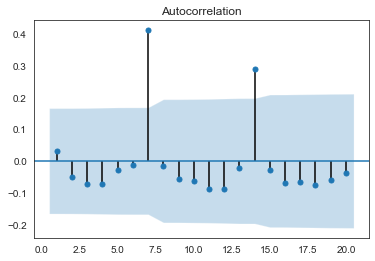

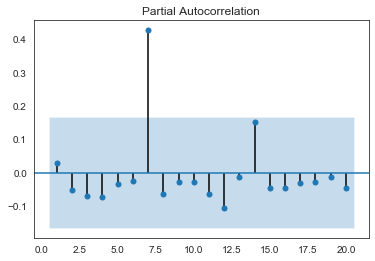

In [87]:
plot_acf(df_daily, lags=20, zero=False, alpha=0.05)
plot_pacf(df_daily, lags=20, zero=False, alpha=0.05)
plt.show()

#### The Daily TS may need an AR(p) model

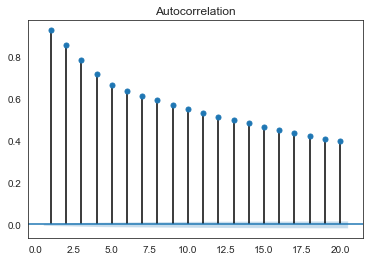

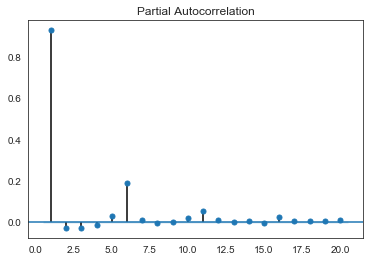

In [88]:
plot_acf(df_min, lags=20, zero=False, alpha=0.05)
plot_pacf(df_min, lags=20, zero=False, alpha=0.05)
plt.show()

#### The 1min TS appears to be a good candidate for AR(p)

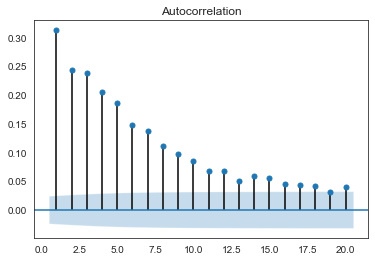

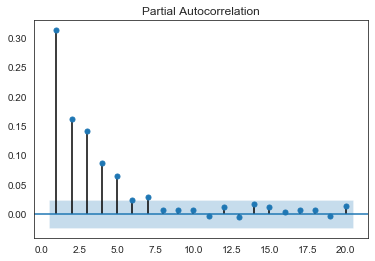

In [89]:
plot_acf(df_30min, lags=20, zero=False, alpha=0.05)
plot_pacf(df_30min, lags=20, zero=False, alpha=0.05)
plt.show()

#### The 30min TS appears to be a good choice for ARMA(p, q)

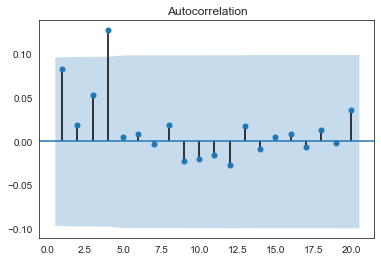

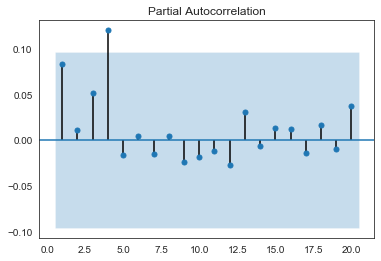

In [90]:
plot_acf(df_8hr, lags=20, zero=False, alpha=0.05)
plot_pacf(df_8hr, lags=20, zero=False, alpha=0.05)
plt.show()

#### Hard to say anything about the 8hr TS based on the ACF plots

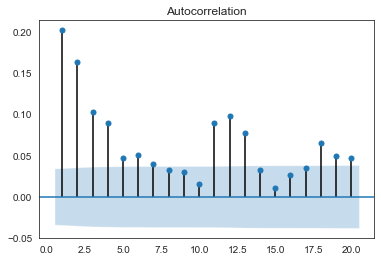

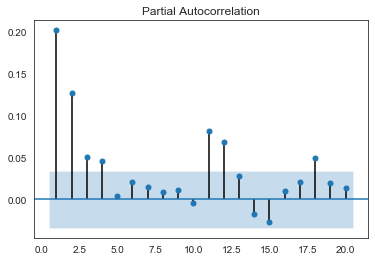

In [91]:
plot_acf(df_hr, lags=20, zero=False, alpha=0.05)
plot_pacf(df_hr, lags=20, zero=False, alpha=0.05)
plt.show()

#### The 1hr TS is possibly an ARMA(p,q) candidate but not certain about that

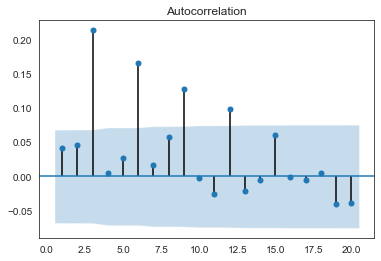

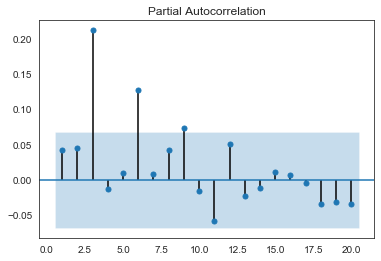

In [92]:
plot_acf(df_4hr, lags=20, zero=False, alpha=0.05)
plot_pacf(df_4hr, lags=20, zero=False, alpha=0.05)
plt.show()

#### The 4hr TS could either be ARMA(p,q) or AR(p)

----

### The 4hr, 30min and 1min plots are visually appealing.  Will put priority focus on them

----

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### I'm using the SARIMAX model because it is the most flexible.  I can create AR, MA, ARMA, ARIMA and SARIMAX models in the same infrastructure, and the diagnostic tests for normality and correlation are very good

In [96]:
for p in range(5):
    
    for q in range(5):
        
        try:
            model = SARIMAX(df_4hr, order=(p, 0, q))
            results = model.fit()
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, "SOMETHING WENT WRONG")

0 0 3169.2004896437497 3173.9219153445406
0 1 3148.881890114284 3158.3247415158653
0 2 3142.291959880086 3156.456236982458
0 3 3087.143101611996 3106.0288044151584
0 4 3086.4692233940705 3110.076351898024
1 0 3143.110047189843 3152.5528985914243


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 1 3031.828325371577 3045.9926024739493
1 2 3033.781445074762 3052.6671478779244
1 3 3036.8010707538688 3060.408199257822
1 4 3014.989729611866 3043.31828381661
2 0 3124.096132057362 3138.260409159734
2 1 3033.781585693189 3052.6672884963514
2 2 3033.5898904920728 3057.197018996026
2 3 3032.5144191957675 3060.8429734005113
2 4 3016.4715531496413 3049.521533055176
3 0 3054.5714850100985 3073.457187813261
3 1 3035.2018839713264 3058.80901247528
3 2 3029.149759703998 3057.4783139087417


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 3 3002.2394071224458 3035.2893870279804


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 4 3003.384950837789 3041.156356444114
4 0 3054.7173172852345 3078.324445789188
4 1 3009.7935596463444 3038.122113851088


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 2 3011.1884445341284 3044.238424439663
4 3 3005.232587536046 3043.003993142371
4 4 2996.5242903052676 3039.0171216123836


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### AIC score suggests ARMA(3,4) is a good choice for 4hr TS. BIC score suggests the same.

In [97]:
for p in range(5):
    
    for q in range(5):
        
        try:
            model = SARIMAX(df_30min, order=(p, 0, q))
            results = model.fit()
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, "SOMETHING WENT WRONG")

0 0 24947.258875283318 24954.059742525787
0 1 24114.470131893344 24128.071866378286
0 2 23830.616692800468 23851.01929452788
0 3 23604.251553541868 23631.45502251175
0 4 23467.335524389753 23501.339860602104
1 0 23729.84207442313 23743.443808908072
1 1 22992.50735408377 23012.90995581118
1 2 22980.344548290024 23007.548017259905
1 3 22982.33603128895 23016.3403675013
1 4 22951.40691077533 22992.212114230155
2 0 23406.430786310888 23426.8333880383
2 1 22980.332151290542 23007.535620260423
2 2 22981.784763178017 23015.789099390367
2 3 22982.488990577225 23023.29419403205


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 4 22972.015404616795 23019.62147531409
3 0 23184.103450584644 23211.306919554525
3 1 22982.28903132544 23016.29336753779
3 2 22982.268680237277 23023.0738836921


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 3 22831.394385509928 22879.00045620722
3 4 22985.533779878628 23039.94071781839
4 0 23094.403286789337 23128.407623001687
4 1 22869.89757558981 22910.702779044634


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 2 22863.057416172403 22910.663486869696


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 3 22835.440778934917 22889.84771687468


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 4 22931.07248459445 22992.280289776685


### AIC score suggests ARMA(3,3) for 30min TS.  BIC score suggests same.

In [98]:
for p in range(5):
    
    for q in range(5):
        
        try:
            model = SARIMAX(df_min, order=(p, 0, q))
            results = model.fit()
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, "SOMETHING WENT WRONG")

0 0 737465.0633084744 737475.2651321056
0 1 555524.3339999741 555544.7376472366
0 2 452404.07290820364 452434.6783790974
0 3 413812.9192436613 413853.72653818625
0 4 363649.1209215554 363700.1300397116
1 0 315473.31288395275 315493.71653121524
1 1 315383.9246459765 315414.53011687024
1 2 315277.22226727195 315318.0295617969
1 3 315171.5019520107 315222.5110701669
1 4 315082.56892695214 315143.7798687396
2 0 315379.46119223663 315410.06666313036
2 1 315156.48106151645 315197.2883560414
2 2 315262.8062821368 315313.81540029304
2 3 315169.2572518741 315230.46819366154
2 4 311083.24019377487 311154.65295919357
3 0 315277.75214877125 315318.5594432962
3 1 314762.5796048966 314813.5887230528


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 2 314013.62774837366 314074.8386901611
3 3 312332.7911383712 312404.2039037899
3 4 309819.9140213938 309901.52861044375
4 0 315269.4322971153 315320.4414152715
4 1 314754.6881709132 314815.89911270066


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 2 312097.54282184533 312168.95558726403


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 3 312343.57433705434 312425.1889261043


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 4 308380.7136678565 308472.53008053766


### AIC score suggests ARMA(3,4) or ARMA(4,4) for 1min TS.  BIC suggests same.

In [99]:
mod_4hr = SARIMAX(df_4hr, order=(3, 0, 4))
res_4hr = mod_4hr.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [100]:
res_4hr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                  830
Model:               SARIMAX(3, 0, 4)   Log Likelihood               -1493.692
Date:                Thu, 08 Oct 2020   AIC                           3003.385
Time:                        21:48:46   BIC                           3041.156
Sample:                    09-23-2017   HQIC                          3017.870
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0124      0.029      0.428      0.668      -0.044       0.069
ar.L2          0.0089      0.029      0.310      0.757      -0.047       0.065
ar.L3          0.9780      0.014     69.030      0.000       0.950       1.006
ma.L1          0.0398      0.045      0.889      0.374      -0.048       0.128
ma.L2          0.0113      0.039      0.287      0.774      -0.066       0.089
ma.L3         -0.9067      0.023    -40.105      0.000      -0.951      -0.862
ma.L4         -0.0505      0.053     -0.951      0.342      -0.155       0.054
sigma2         2.1314      0.034     61.816      0.000       2.064       2.199
===================================================================================
Ljung-Box (Q):                       66.79   Jarque-Bera (JB):             36932.70
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             4.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prob(Q) //Ljung-Box Test for residual correlation// is statistically significant, and can't reject the null hypothesis of correlation among residuals.  Prob(JB) //Jarque-Bera Test for normal residual distribution// is statistically significant, and can't reject the null hypothesis of non-normal distribution.

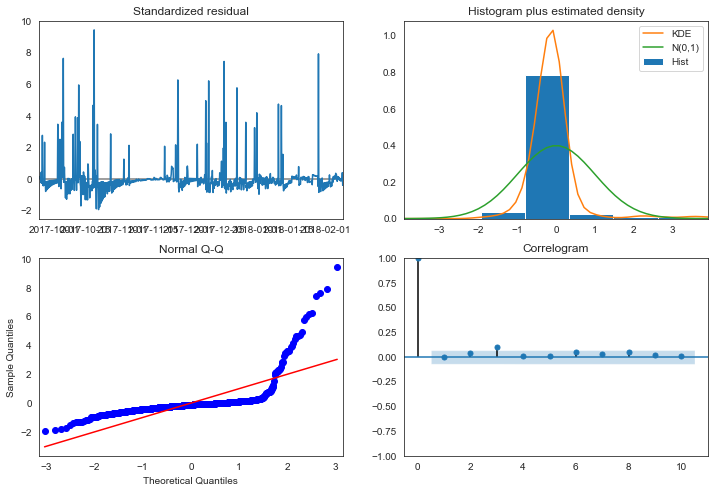

In [102]:
res_4hr.plot_diagnostics(figsize=(12,8))
plt.show()

### Diagnostic plot confirms non-normality in residuals

In [103]:
mod_30min = SARIMAX(df_30min, order=(3, 0, 3))
res_30min = mod_30min.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [104]:
res_30min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                 6640
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -11408.697
Date:                Thu, 08 Oct 2020   AIC                          22831.394
Time:                        21:56:17   BIC                          22879.000
Sample:                    09-23-2017   HQIC                         22847.842
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8245      0.009     92.352      0.000       0.807       0.842
ar.L2          0.9982      0.003    329.206      0.000       0.992       1.004
ar.L3         -0.8228      0.009    -90.184      0.000      -0.841      -0.805
ma.L1         -0.6209      0.011    -54.734      0.000      -0.643      -0.599
ma.L2         -0.9939      0.005   -220.233      0.000      -1.003      -0.985
ma.L3          0.6194      0.011     54.005      0.000       0.597       0.642
sigma2         1.8177      0.008    231.462      0.000       1.802       1.833
===================================================================================
Ljung-Box (Q):                       71.08   Jarque-Bera (JB):            626772.20
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                             5.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        49.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prob(Q) and Prob(JB) both significant.  Can't reject null hypothesis.

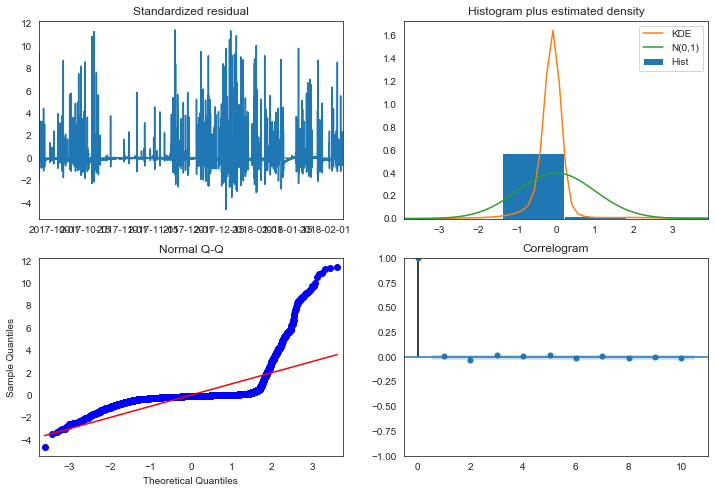

In [105]:
res_30min.plot_diagnostics(figsize=(12,8))
plt.show()

### Visuals confirm statistical tests.

In [106]:
mod_min1 = SARIMAX(df_min, order=(3, 0, 3))
res_min1 = mod_min1.fit()

In [107]:
res_min1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:               199152
Model:               SARIMAX(3, 0, 3)   Log Likelihood             -156159.396
Date:                Thu, 08 Oct 2020   AIC                         312332.791
Time:                        22:00:59   BIC                         312404.204
Sample:                    09-23-2017   HQIC                        312353.813
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9965      0.003    676.141      0.000       1.991       2.002
ar.L2         -1.7337      0.005   -354.285      0.000      -1.743      -1.724
ar.L3          0.6952      0.003    276.107      0.000       0.690       0.700
ma.L1         -1.0558      0.003   -350.507      0.000      -1.062      -1.050
ma.L2          0.8149      0.003    325.345      0.000       0.810       0.820
ma.L3         -0.0792      0.001    -82.897      0.000      -0.081      -0.077
sigma2         0.2809   8.46e-05   3319.787      0.000       0.281       0.281
===================================================================================
Ljung-Box (Q):                     5573.91   Jarque-Bera (JB):         624101805.44
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             3.55
Prob(H) (two-sided):                  0.00   Kurtosis:                       277.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Statistical tests both significant//can't reject null hypothesis

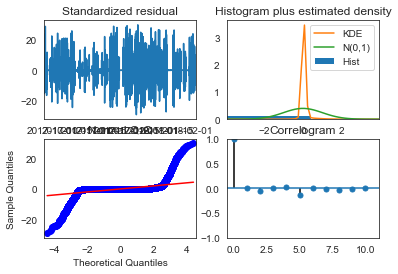

In [108]:
res_min1.plot_diagnostics()
plt.show()

### Visuals confirm tests

----

### Need To Transform The Subsets In Order To Achieve Normality

In [114]:
diff_4hr = df_4hr.diff().dropna()
diff_4hr.head()

,max_pressure
timestamp,
2017-09-24 00:00:00,0.20
2017-09-24 04:00:00,-0.10
2017-09-24 08:00:00,0.00
2017-09-24 12:00:00,0.00
2017-09-24 16:00:00,0.00


In [115]:
diff_4hr.describe()

,max_pressure
count,829.00
mean,-0.00
std,2.09
min,-15.10
25%,0.00
50%,0.00
75%,0.00
max,15.60


In [116]:
diff_mod_4hr = SARIMAX(diff_4hr, order=(3, 0, 4))
res_diff_4hr = diff_mod_4hr.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [117]:
res_diff_4hr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                  829
Model:               SARIMAX(3, 0, 4)   Log Likelihood               -1487.470
Date:                Thu, 08 Oct 2020   AIC                           2990.940
Time:                        22:06:46   BIC                           3028.701
Sample:                    09-24-2017   HQIC                          3005.422
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1758      0.116     -1.511      0.131      -0.404       0.052
ar.L2         -0.1752      0.117     -1.503      0.133      -0.404       0.053
ar.L3          0.8139      0.119      6.841      0.000       0.581       1.047
ma.L1         -0.7501      0.129     -5.793      0.000      -1.004      -0.496
ma.L2          0.0099      0.045      0.219      0.827      -0.078       0.098
ma.L3         -0.9452      0.028    -33.627      0.000      -1.000      -0.890
ma.L4          0.6975      0.136      5.127      0.000       0.431       0.964
sigma2         2.1084      0.036     58.963      0.000       2.038       2.179
===================================================================================
Ljung-Box (Q):                       45.32   Jarque-Bera (JB):             34799.22
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             4.89
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

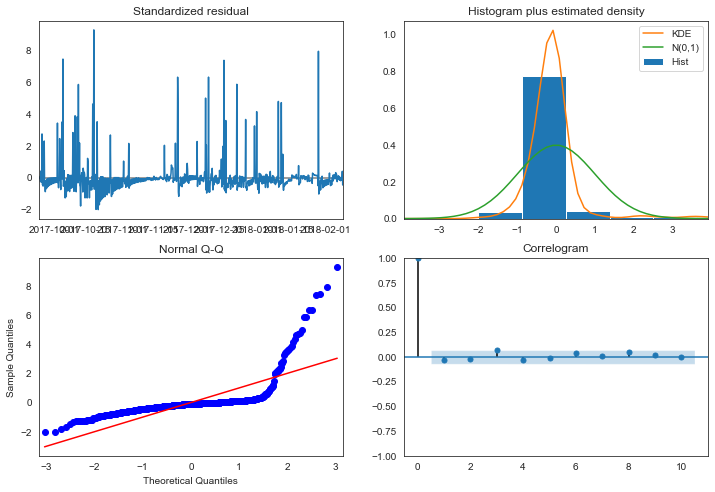

In [118]:
res_diff_4hr.plot_diagnostics(figsize=(12,8))
plt.show()


In [119]:
diff_4hr2 = df_4hr.diff().diff().dropna()
diff_4hr2

,max_pressure
timestamp,
2017-09-24 04:00:00,-0.30
2017-09-24 08:00:00,0.10
2017-09-24 12:00:00,0.00
2017-09-24 16:00:00,0.00
2017-09-24 20:00:00,-0.40
2017-09-25 00:00:00,1.40
2017-09-25 04:00:00,-2.00
2017-09-25 08:00:00,1.00
2017-09-25 12:00:00,4.60


In [120]:
diff_4hr2.describe()

,max_pressure
count,828.00
mean,-0.00
std,3.62
min,-30.70
25%,0.00
50%,0.00
75%,0.10
max,15.70


In [121]:
diff_mod2_4hr = SARIMAX(diff_4hr2, order=(3, 0, 4))
res_diff2_4hr = diff_mod2_4hr.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [122]:
res_diff2_4hr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                  828
Model:               SARIMAX(3, 0, 4)   Log Likelihood               -1512.906
Date:                Thu, 08 Oct 2020   AIC                           3041.812
Time:                        22:09:19   BIC                           3079.564
Sample:                    09-24-2017   HQIC                          3056.291
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8691      0.035    -53.731      0.000      -1.937      -1.801
ar.L2         -1.0110      0.065    -15.495      0.000      -1.139      -0.883
ar.L3         -0.0241      0.035     -0.679      0.497      -0.094       0.045
ma.L1         -0.0810      0.055     -1.470      0.142      -0.189       0.027
ma.L2         -1.7213      0.058    -29.684      0.000      -1.835      -1.608
ma.L3         -0.1546      0.044     -3.499      0.000      -0.241      -0.068
ma.L4          0.9570      0.060     15.819      0.000       0.838       1.076
sigma2         2.2160      0.134     16.547      0.000       1.954       2.478
===================================================================================
Ljung-Box (Q):                      106.90   Jarque-Bera (JB):             33955.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                             4.91
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

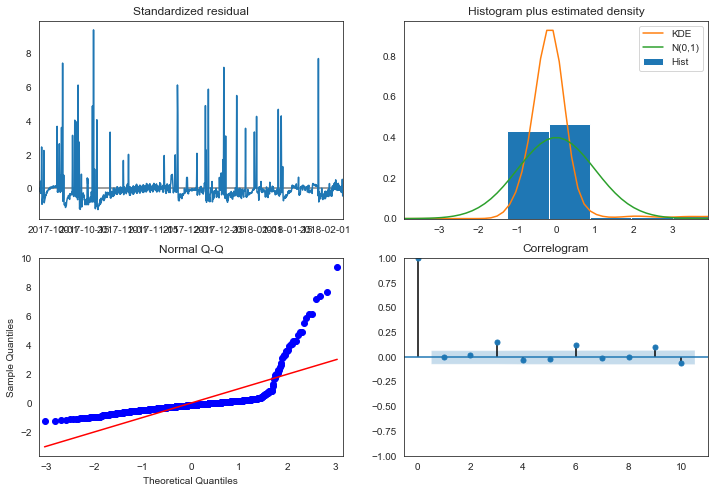

In [123]:
res_diff2_4hr.plot_diagnostics(figsize=(12,8))
plt.show()

### Even after 2 diffs, the 4hr TS is still not normally distributed

In [124]:
diff_30min = df_30min.diff().dropna()
diff_30min.head()

,max_pressure
timestamp,
2017-09-23 20:30:00,-0.30
2017-09-23 21:00:00,0.00
2017-09-23 21:30:00,0.00
2017-09-23 22:00:00,0.00
2017-09-23 22:30:00,13.00


In [125]:
diff_30min.describe()

,max_pressure
count,6639.00
mean,0.00
std,1.72
min,-15.60
25%,0.00
50%,0.00
75%,0.00
max,15.60


In [126]:
diff_mod_30min = SARIMAX(diff_30min, order=(3, 0, 3))
diff_res_30min = diff_mod_30min.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [127]:
diff_res_30min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                 6639
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -11407.380
Date:                Thu, 08 Oct 2020   AIC                          22828.761
Time:                        22:12:52   BIC                          22876.366
Sample:                    09-23-2017   HQIC                         22845.208
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.022     -5.858      0.000      -0.170      -0.085
ar.L2          0.8437      0.013     67.405      0.000       0.819       0.868
ar.L3         -0.0271      0.010     -2.615      0.009      -0.047      -0.007
ma.L1         -0.6583      0.020    -32.395      0.000      -0.698      -0.618
ma.L2         -0.9940      0.005   -215.010      0.000      -1.003      -0.985
ma.L3          0.6559      0.020     33.273      0.000       0.617       0.694
sigma2         1.8186      0.007    251.283      0.000       1.804       1.833
===================================================================================
Ljung-Box (Q):                       69.53   Jarque-Bera (JB):            622848.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.71   Skew:                             5.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        48.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

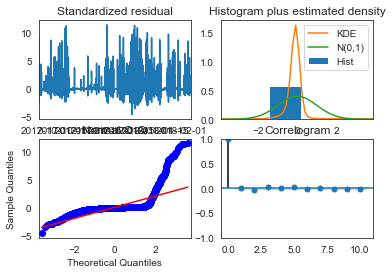

In [129]:
diff_res_30min.plot_diagnostics()
plt.show()

In [130]:
diff2_30min = df_30min.diff().diff().dropna()
diff2_30min.head()

,max_pressure
timestamp,
2017-09-23 21:00:00,0.30
2017-09-23 21:30:00,0.00
2017-09-23 22:00:00,0.00
2017-09-23 22:30:00,13.00
2017-09-23 23:00:00,-25.50


In [131]:
diff2_30min.describe()

,max_pressure
count,6638.00
mean,0.00
std,2.93
min,-31.20
25%,0.00
50%,0.00
75%,0.00
max,18.50


In [132]:
diff2_mod_30min = SARIMAX(diff2_30min, order=(3, 0, 3))
diff2_res_30min = diff2_mod_30min.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [133]:
diff2_res_30min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                 6638
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -11479.866
Date:                Thu, 08 Oct 2020   AIC                          22973.731
Time:                        22:15:34   BIC                          23021.335
Sample:                    09-23-2017   HQIC                         22990.178
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7799      0.006   -123.885      0.000      -0.792      -0.768
ar.L2          0.3373      0.008     41.330      0.000       0.321       0.353
ar.L3          0.1173      0.006     18.725      0.000       0.105       0.130
ma.L1         -0.9821      0.027    -36.147      0.000      -1.035      -0.929
ma.L2         -0.9999      0.008   -121.055      0.000      -1.016      -0.984
ma.L3          0.9820      0.026     37.441      0.000       0.931       1.033
sigma2         1.8552      0.045     40.993      0.000       1.767       1.944
===================================================================================
Ljung-Box (Q):                      188.52   Jarque-Bera (JB):            589456.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             5.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        47.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Taking Diff on 30min TS isn't working for normality 

In [134]:
diff_min = df_min.diff().dropna()
diff_min.head()

,max_pressure
timestamp,
2017-09-23 20:22:00,0.30
2017-09-23 20:23:00,0.00
2017-09-23 20:24:00,0.00
2017-09-23 20:25:00,0.00
2017-09-23 20:26:00,-0.60


In [135]:
diff_min.describe()

,max_pressure
count,199151.00
mean,0.00
std,0.54
min,-15.40
25%,0.00
50%,0.00
75%,0.00
max,15.80


In [136]:
diff_mod_min1 = SARIMAX(diff_min, order=(3, 0, 3))
diff_res_min1 = diff_mod_min1.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [137]:
diff_res_min1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:               199151
Model:               SARIMAX(3, 0, 3)   Log Likelihood             -155776.722
Date:                Thu, 08 Oct 2020   AIC                         311567.445
Time:                        22:23:20   BIC                         311638.857
Sample:                    09-23-2017   HQIC                        311588.467
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5392      0.004   -120.430      0.000      -0.548      -0.530
ar.L2          0.5761      0.002    294.865      0.000       0.572       0.580
ar.L3          0.6196      0.004    176.289      0.000       0.613       0.627
ma.L1          0.4922      0.004    121.978      0.000       0.484       0.500
ma.L2         -0.7005      0.002   -378.231      0.000      -0.704      -0.697
ma.L3         -0.7542      0.003   -221.062      0.000      -0.761      -0.747
sigma2         0.2806   9.01e-05   3115.177      0.000       0.280       0.281
===================================================================================
Ljung-Box (Q):                     5463.71   Jarque-Bera (JB):         600425955.16
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.73   Skew:                             3.51
Prob(H) (two-sided):                  0.00   Kurtosis:                       271.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [138]:
from scipy.stats import boxcox

In [155]:
min_abs = np.abs(df_min)
min_abs.head()

,max_pressure
timestamp,
2017-09-23 20:21:00,0.30
2017-09-23 20:22:00,0.60
2017-09-23 20:23:00,0.60
2017-09-23 20:24:00,0.60
2017-09-23 20:25:00,0.60


In [156]:
min_abs.describe()

,max_pressure
count,199152.00
mean,0.58
std,1.43
min,0.00
25%,0.00
50%,0.30
75%,0.60
max,16.80


In [160]:
min_cube = [x**3 for x in df_min['max_pressure']]

In [163]:
df_min['cubed_max'] = min_cube

In [164]:
df_min.head()

,max_pressure,cubed_max
timestamp,,
2017-09-23 20:21:00,0.30,0.03
2017-09-23 20:22:00,0.60,0.22
2017-09-23 20:23:00,0.60,0.22
2017-09-23 20:24:00,0.60,0.22
2017-09-23 20:25:00,0.60,0.22


In [165]:
df_min.describe()

,max_pressure,cubed_max
count,199152.00,199152.00
mean,0.58,21.51
std,1.43,202.28
min,0.00,0.00
25%,0.00,0.00
50%,0.30,0.03
75%,0.60,0.22
max,16.80,4741.63


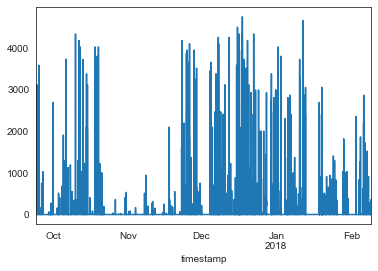

In [167]:
df_min['cubed_max'].plot()
plt.show()

In [168]:
min_cubed = df_min[['cubed_max']]

In [169]:
cube_min1 = SARIMAX(min_cubed, order=(3, 0, 3))
res_cube1 = cube_min1.fit()

In [170]:
res_cube1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              cubed_max   No. Observations:               199152
Model:               SARIMAX(3, 0, 3)   Log Likelihood            -1212461.490
Date:                Thu, 08 Oct 2020   AIC                        2424936.981
Time:                        22:37:10   BIC                        2425008.394
Sample:                    09-23-2017   HQIC                       2424958.003
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1739      0.002    666.676      0.000       1.170       1.177
ar.L2         -0.8655      0.002   -385.771      0.000      -0.870      -0.861
ar.L3          0.4019      0.001    343.126      0.000       0.400       0.404
ma.L1         -0.2954      0.002   -164.762      0.000      -0.299      -0.292
ma.L2          0.6606      0.001    535.466      0.000       0.658       0.663
ma.L3          0.1834      0.001    237.587      0.000       0.182       0.185
sigma2      1.137e+04      2.165   5249.150      0.000    1.14e+04    1.14e+04
===================================================================================
Ljung-Box (Q):                     8223.68   Jarque-Bera (JB):        3365460702.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                            10.66
Prob(H) (two-sided):                  0.00   Kurtosis:                       639.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

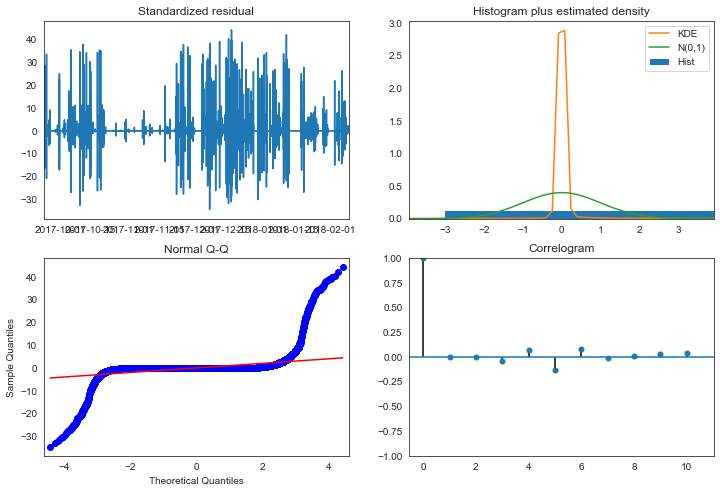

In [171]:
res_cube1.plot_diagnostics(figsize=(12,8))
plt.show()

In [172]:
cube_4hr = [x**3 for x in df_4hr['max_pressure']]

In [175]:
df_4hr['cube_max'] = cube_4hr

In [176]:
df_4hr.describe()

,max_pressure,cube_max
count,830.00,830.00
mean,0.62,23.07
std,1.51,187.97
min,0.00,0.00
25%,0.00,0.00
50%,0.30,0.03
75%,0.60,0.22
max,15.60,3796.42


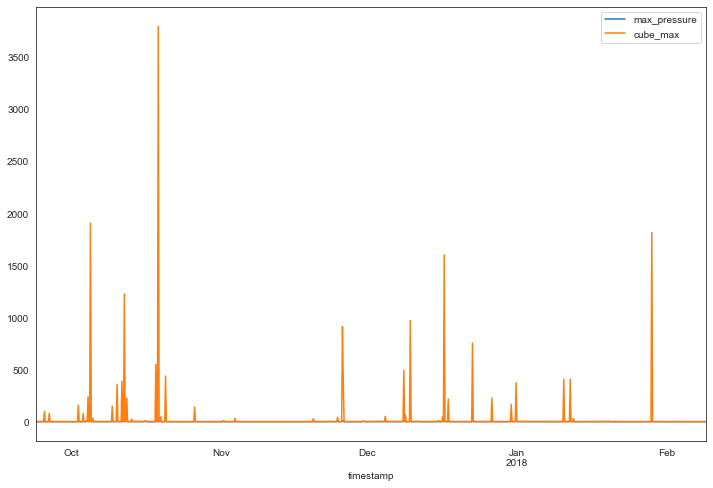

In [177]:
df_4hr.plot(figsize=(12,8))
plt.show()

In [178]:
df_cube4hr = df_4hr[['cube_max']]

In [179]:
cube_mod_4hr = SARIMAX(df_cube4hr, order=(3, 0, 4))
cube_res_4hr = cube_mod_4hr.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [180]:
cube_res_4hr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               cube_max   No. Observations:                  830
Model:               SARIMAX(3, 0, 4)   Log Likelihood               -5522.037
Date:                Thu, 08 Oct 2020   AIC                          11060.074
Time:                        22:41:58   BIC                          11097.845
Sample:                    09-23-2017   HQIC                         11074.559
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1467      1.253      0.117      0.907      -2.309       2.603
ar.L2          0.2147      0.670      0.321      0.749      -1.098       1.527
ar.L3          0.6082      0.735      0.827      0.408      -0.833       2.049
ma.L1         -0.1484      1.256     -0.118      0.906      -2.610       2.313
ma.L2         -0.2250      0.825     -0.273      0.785      -1.841       1.391
ma.L3         -0.5279      0.733     -0.720      0.471      -1.964       0.908
ma.L4         -0.0372      0.175     -0.213      0.831      -0.380       0.305
sigma2      3.501e+04    520.454     67.268      0.000     3.4e+04     3.6e+04
===================================================================================
Ljung-Box (Q):                       14.33   Jarque-Bera (JB):           1680170.30
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            13.28
Prob(H) (two-sided):                  0.00   Kurtosis:                       221.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

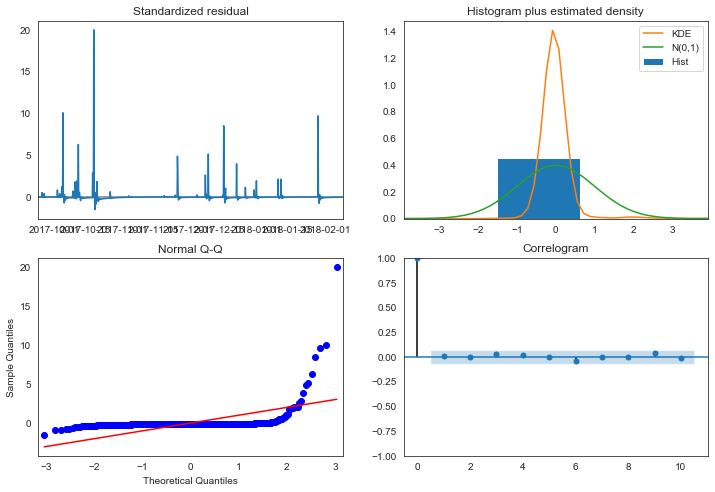

In [182]:
cube_res_4hr.plot_diagnostics(figsize=(12,8))
plt.show()

In [183]:
cube_30min = [x**3 for x in df_30min['max_pressure']]

In [185]:
df_30min['cube_max'] = cube_30min

In [186]:
df_30min.describe()

,max_pressure,cube_max
count,6640.00,6640.00
mean,0.59,23.23
std,1.47,214.95
min,0.00,0.00
25%,0.00,0.00
50%,0.30,0.03
75%,0.60,0.22
max,16.80,4741.63


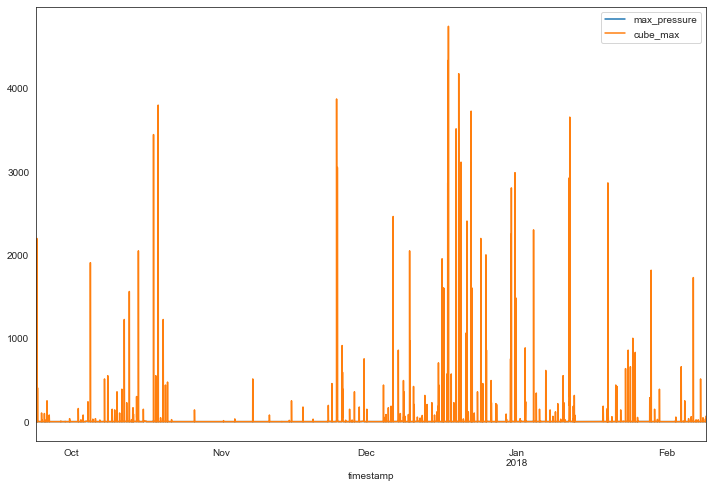

In [187]:
df_30min.plot(figsize=(12,8))
plt.show()

In [188]:
cube_30min = df_30min[['cube_max']]

In [190]:
cube_mod_30min = SARIMAX(cube_30min, order=(3, 0, 3))
cube_res_30min = cube_mod_30min.fit()

In [191]:
cube_res_30min.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               cube_max   No. Observations:                 6640
Model:               SARIMAX(3, 0, 3)   Log Likelihood              -44979.381
Date:                Thu, 08 Oct 2020   AIC                          89972.761
Time:                        22:47:46   BIC                          90020.367
Sample:                    09-23-2017   HQIC                         89989.209
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6073      0.058    -10.540      0.000      -0.720      -0.494
ar.L2          0.5797      0.035     16.784      0.000       0.512       0.647
ar.L3          0.6209      0.050     12.356      0.000       0.522       0.719
ma.L1          0.6750      0.059     11.449      0.000       0.559       0.791
ma.L2         -0.4515      0.037    -12.174      0.000      -0.524      -0.379
ma.L3         -0.5054      0.048    -10.459      0.000      -0.600      -0.411
sigma2       4.48e+04     90.806    493.386      0.000    4.46e+04     4.5e+04
===================================================================================
Ljung-Box (Q):                       69.71   Jarque-Bera (JB):          10952946.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            13.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       200.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

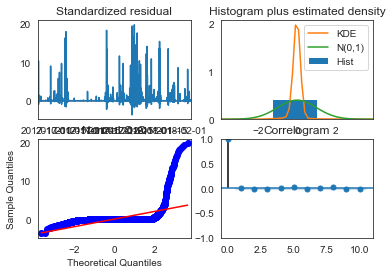

In [193]:
cube_res_30min.plot_diagnostics()
plt.show()

----

In [194]:
for p in range(5):
    
    for q in range(5):
        
        try:
            model = SARIMAX(df_daily, order=(p, 0, q))
            results = model.fit()
            print(p, q, results.aic, results.bic)
        except:
            print(p, q, "SOMETHING WENT WRONG")

0 0 668.1344256013582 671.0760680239675
0 1 667.6437905882526 673.5270754334712
0 2 669.1762321047596 678.0011593725875
0 3 670.9608389557842 682.7274086462214
0 4 672.9603909015647 687.6686030146112
1 0 667.3692939064645 673.252578751683
1 1 659.1228633122046 667.9477905800325


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 2 660.9202439196386 672.6868136100758


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 3 662.6871093198171 677.3953214328636
1 4 664.7555472992416 682.4054018348974
2 0 669.011802058568 677.8367293263959


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 660.9354382117768 672.7020079022141


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 661.2832801339927 675.9914922470392


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 3 664.165719510813 681.8155740464688


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 4 665.2194488425796 685.8109458008447
3 0 670.8449074160393 682.6114771064765


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 1 662.6680313575973 677.3762434706439


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 2 664.1700556516155 681.8199101872713


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 3 661.6633684015485 682.2548653598136


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 4 664.9801324328807 688.5132718137552
4 0 672.6647333394433 687.3729454524898


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 1 664.1535904080407 681.8034449436965


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 2 666.0402662256079 686.631763183873


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 3 659.9887661600715 683.5219055409459
4 4 660.9615643763389 687.4363461798226


C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### AIC suggest ARMA(4,3) for Daily TS.  BIC could indicate AR(1).

In [196]:
day_mod = SARIMAX(df_daily, order=(1, 0, 0))
res_day = day_mod.fit()

In [197]:
res_day.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                  140
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -331.685
Date:                Thu, 08 Oct 2020   AIC                            667.369
Time:                        22:52:35   BIC                            673.253
Sample:                    09-23-2017   HQIC                           669.760
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1394      0.107      1.306      0.191      -0.070       0.348
sigma2         6.6881      0.271     24.664      0.000       6.157       7.220
===================================================================================
Ljung-Box (Q):                       58.36   Jarque-Bera (JB):              1987.87
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             4.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

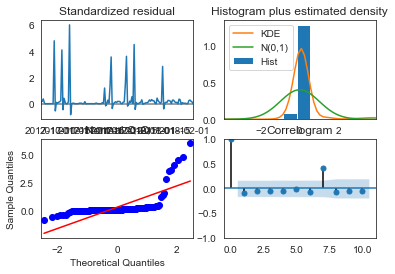

In [199]:
res_day.plot_diagnostics()
plt.show()

In [206]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [209]:
day_decomp = seasonal_decompose(df_daily['max_pressure'], period=7)

<Figure size 864x576 with 0 Axes>

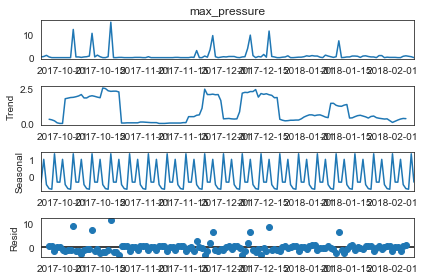

In [212]:

day_decomp.plot()
plt.show()

In [215]:
rolling_day = df_daily - df_daily.rolling(7).mean()

In [217]:
rolling_day.describe()

,max_pressure
count,134.00
mean,0.00
std,2.38
min,-2.50
25%,-1.30
50%,-0.12
75%,0.07
max,13.06


In [219]:
rolling_day = rolling_day.dropna()

In [220]:
rolling_day.head()

,max_pressure
timestamp,
2017-09-29,-0.30
2017-09-30,-0.26
2017-10-01,-0.19
2017-10-02,-0.04
2017-10-03,-0.00


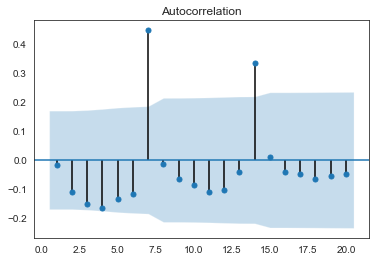

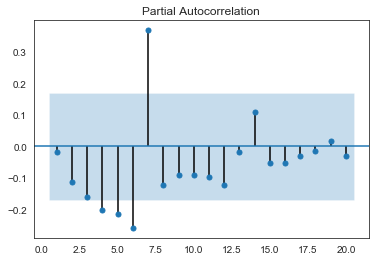

In [221]:
plot_acf(rolling_day, lags=20, zero=False, alpha=0.05)
plot_pacf(rolling_day, lags=20, zero=False, alpha=0.05)
plt.show()

In [222]:
day_diff = df_daily - df_daily.diff(7)

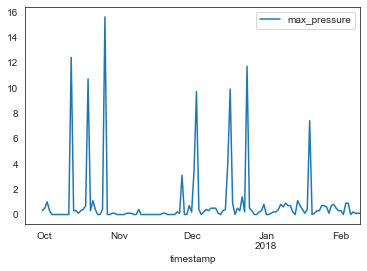

In [224]:
day_diff.plot()
plt.show()

In [225]:
day_diff.describe()

,max_pressure
count,133.00
mean,0.91
std,2.53
min,0.00
25%,0.00
50%,0.20
75%,0.50
max,15.60


In [238]:
day_sarima = SARIMAX(df_daily, order=(3, 0, 3), seasonal_order=(1, 0, 0, 7))

In [239]:
resday_sarima = day_sarima.fit()

C:\Users\GH37G0\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [240]:
resday_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       max_pressure   No. Observations:                  140
Model:             SARIMAX(3, 0, 3)x(1, 0, [], 7)   Log Likelihood                -312.769
Date:                            Thu, 08 Oct 2020   AIC                            641.539
Time:                                    23:25:44   BIC                            665.072
Sample:                                09-23-2017   HQIC                           651.102
                                     - 02-09-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5530      0.201     -2.757      0.006      -0.946      -0.160
ar.L2          0.6081      0.144      4.234      0.000       0.327       0.890
ar.L3          0.9430      0.141      6.674      0.000       0.666       1.220
ma.L1          0.5967      0.381      1.566      0.117      -0.150       1.343
ma.L2         -0.5921      0.516     -1.148      0.251      -1.603       0.419
ma.L3         -0.9800      0.274     -3.581      0.000      -1.516      -0.444
ar.S.L7        0.4015      0.126      3.184      0.001       0.154       0.649
sigma2         4.9046      0.936      5.240      0.000       3.070       6.739
===================================================================================
Ljung-Box (Q):                       22.86   Jarque-Bera (JB):              1151.16
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             2.99
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

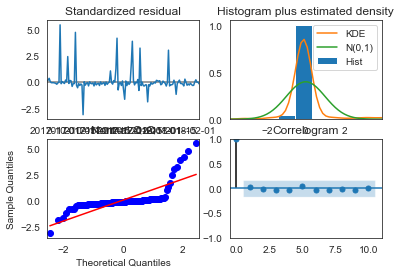

In [241]:
resday_sarima.plot_diagnostics()
plt.show()

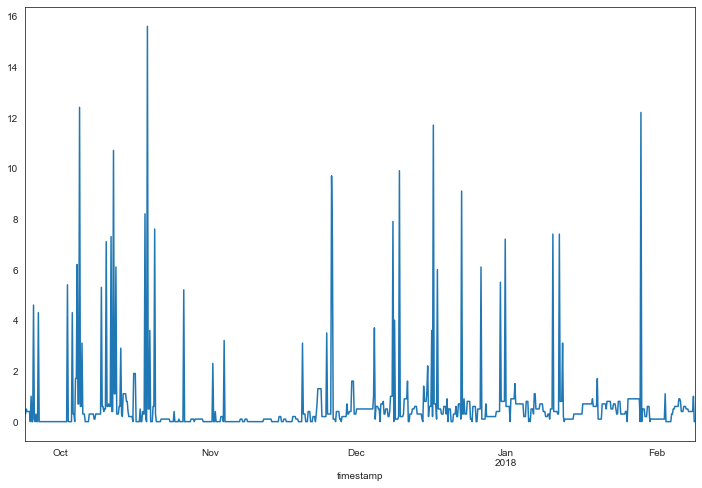

In [243]:
df_4hr['max_pressure'].plot(figsize=(12,8))

In [244]:
max_4hr = df_4hr[['max_pressure']]

In [247]:
train_4hr = max_4hr[:'2017']

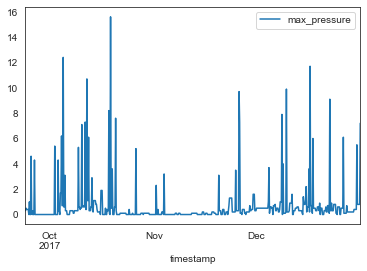

In [248]:
train_4hr.plot()
plt.show()

In [249]:
mod4_train = SARIMAX(train_4hr, order=(3, 0, 4))
res4_train = mod4_train.fit()

In [251]:
test_max4 = max_4hr['2018':]

In [255]:
len(test_max4)

235

In [252]:
res4_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                  595
Model:               SARIMAX(3, 0, 4)   Log Likelihood               -1119.997
Date:                Thu, 08 Oct 2020   AIC                           2255.993
Time:                        23:33:56   BIC                           2291.102
Sample:                    09-23-2017   HQIC                          2269.665
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1658      0.116      1.425      0.154      -0.062       0.394
ar.L2          0.0280      0.116      0.241      0.810      -0.200       0.256
ar.L3          0.7946      0.077     10.258      0.000       0.643       0.946
ma.L1         -0.1131      0.126     -0.896      0.370      -0.361       0.134
ma.L2         -0.0138      0.120     -0.115      0.908      -0.248       0.221
ma.L3         -0.6231      0.089     -7.028      0.000      -0.797      -0.449
ma.L4         -0.1314      0.080     -1.638      0.101      -0.289       0.026
sigma2         2.5206      0.079     31.816      0.000       2.365       2.676
===================================================================================
Ljung-Box (Q):                       33.31   Jarque-Bera (JB):             16543.26
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             4.43
Prob(H) (two-sided):                  0.01   Kurtosis:                        27.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

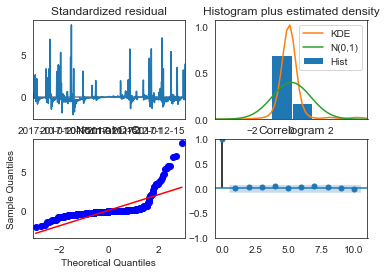

In [254]:
res4_train.plot_diagnostics()
plt.show()

In [276]:
mod100 = SARIMAX(df_daily, order=(3, 0, 0), trend='c')
res100 = mod100.fit()

In [277]:
res100.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           max_pressure   No. Observations:                  140
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -324.054
Date:                Thu, 08 Oct 2020   AIC                            658.107
Time:                        23:52:07   BIC                            672.816
Sample:                    09-23-2017   HQIC                           664.084
                         - 02-09-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9604      0.832      1.155      0.248      -0.670       2.590
ar.L1          0.0273      0.139      0.196      0.845      -0.246       0.301
ar.L2         -0.0487      0.382     -0.127      0.899      -0.797       0.700
ar.L3         -0.0671      0.866     -0.078      0.938      -1.764       1.630
sigma2         5.9974      0.823      7.284      0.000       4.384       7.611
===================================================================================
Ljung-Box (Q):                       53.50   Jarque-Bera (JB):              2036.51
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             4.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

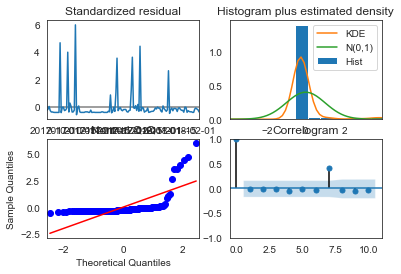

In [278]:
res100.plot_diagnostics()
plt.show()

In [299]:
np.max(res100.forecast('2019'))

0.9580935551411772

In [300]:
np.max(res_4hr.forecast('2019'))

0.4986077263429171

In [302]:
np.max(res_30min.forecast('2019'))

1.6768385049123744

In [304]:
np.max(res_min1.forecast('2019'))

3.9086266924575543

### My obsession with chasing normality aside, the only somewhat north of dumpster fire models I've got are nowhere close to predicting a max level of 50.  The largest prediction is 3.9 at the 1 minute frequency level.  